### Practical 5
### Aim : Implement ensemble algorithms.

#### Problem Statement: 
    In this practical, we will explore ensemble algorithms using Python libraries. We will work with a dataset, perform undersampling to address class imbalance, prepare the data, and apply ensemble methods. Specifically, we will implement a random forest classifier and evaluate its performance using accuracy.

#### Theory:
    1.	Undersampling for Class Imbalance: We address the issue of imbalanced data by using the undersampling approach. This approach reduces the number of observations for the majority class to balance it with the minority class.
    2.	Data Preparation: We prepare the dataset by normalizing the features to have the same scale. Normalizing the data helps improve the performance of some machine learning models.
    3.	Train-Test Split: The dataset is divided into training and testing sets to evaluate the model's performance.
    4.	Random Forest Classifier: We implement a random forest classifier, which is an ensemble method. The random forest classifier consists of multiple decision trees and combines their predictions to make more accurate classifications.


In [1]:
import pandas as pd
loan_data = pd.read_csv("loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


##### We notice an imbalanced data scenario, where there are many more observations with class 0 (8045 observations) than there are for class 1 (only 1533 observations).

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


<Axes: ylabel='not.fully.paid'>

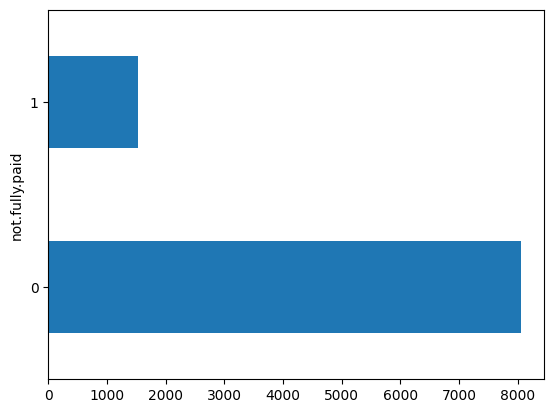

In [2]:
print(loan_data['not.fully.paid'].value_counts())
loan_data['not.fully.paid'].value_counts().plot(kind='barh')

We notice an imbalanced data scenario, where there are much more observations with class 0 than there are for class 1. 
One way of solving this issue is using the undersampling approach, meaning that we are reducing the number of observations for the class 0. In this scenario, there will be as many observations for class 0 as there are for class 1.  
- First get the number of class 1.   
- Create a new dataframe of class 0. 
- Concatenate the final two dataframes. 

In [3]:
loan_data_class_1 = loan_data[loan_data['not.fully.paid'] == 1]
number_class_1 = len(loan_data_class_1)
loan_data_class_0 = loan_data[loan_data['not.fully.paid'] == 0].sample(number_class_1)

final_loan_data = pd.concat([loan_data_class_1, loan_data_class_0])
print(final_loan_data.shape)

(3066, 14)


##### Overall 3066 observations and 14 columns.

not.fully.paid
1    1533
0    1533
Name: count, dtype: int64


<Axes: ylabel='not.fully.paid'>

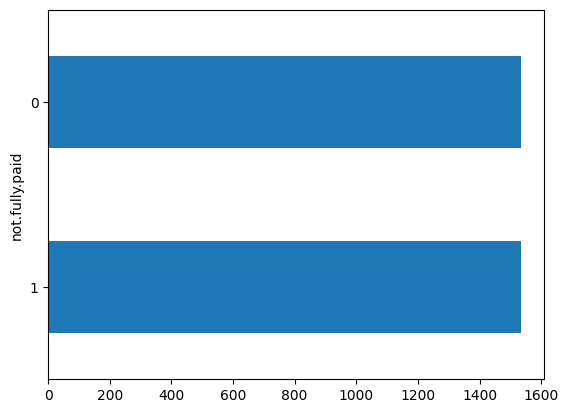

In [4]:
print(final_loan_data['not.fully.paid'].value_counts())
final_loan_data['not.fully.paid'].value_counts().plot(kind='barh')

## Data preparation
By looking at the data set, we notice that not all the features have the same scale, and some machine learning models such as KNN are sensitive to this scaling issue. This can be addressed by normalizing the ranges of the features to the same scale. In this scenario, between 0 and 1.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Remove unwanted 'purpose' column and get the data
final_loan_data.drop(['purpose'], axis=1, inplace=True)
X = final_loan_data.drop('not.fully.paid', axis=1)

normalized_X = scaler.fit_transform(X)
final_loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
57,1,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1
65,1,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1
73,1,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1


##### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

y = final_loan_data['not.fully.paid']
r_state = 2023
t_size = 0.33

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y,
                                                    test_size=t_size,
                                                    random_state=r_state,
                                                    stratify=y)

##### Using Bagging Model

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Define the model
random_forest_model = RandomForestClassifier()

# Fit the random search object to the data
random_forest_model.fit(X_train, y_train)
# Make predictions
y_pred = random_forest_model.predict(X_test)

# Get the performance 
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.607707509881423


#### Result Analysis: 
    We observe an accuracy of approximately 60.77% for the random forest classifier. This accuracy metric is used to assess the performance of the ensemble model.

#### Conclusion: 
    Practical 5 demonstrates the implementation of ensemble algorithms, specifically the random forest classifier, to address imbalanced data and make accurate predictions. The accuracy achieved serves as an evaluation metric for the model's performance. Ensemble methods are valuable tools for improving classification accuracy in machine learning tasks.